In [ ]:
from google.colab import drive
import pandas as pd

# Google Drive'ı bağla
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dosyanın yolunu belirle
file_path = '/content/drive/My Drive/Advertising.csv'  # Dosyanın tam yolu

# Veriyi oku
df = pd.read_csv(file_path)
df = df.drop('Unnamed: 0', axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


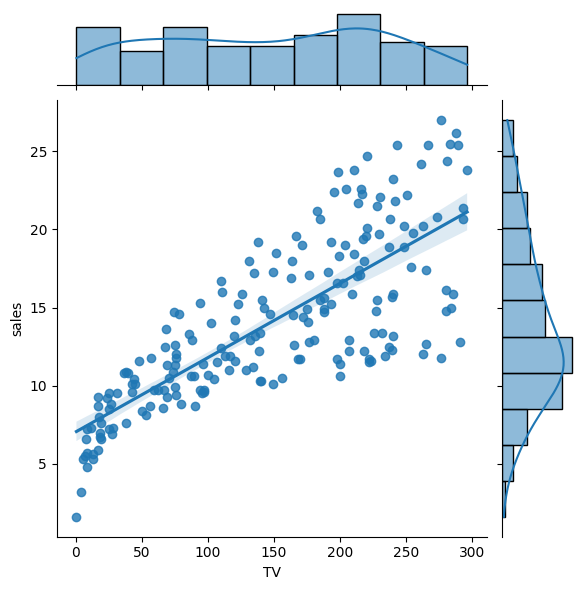

In [ ]:
import seaborn as sns
sns.jointplot(x='TV', y='sales', data=df, kind='reg')

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = df[['TV']]
y = df['sales']

In [ ]:
reg = LinearRegression()

In [ ]:
model = reg.fit(x, y)

In [ ]:
model.intercept_

7.032593549127695

In [ ]:
model.coef_

array([0.04753664])

In [ ]:
model.score(x, y)

0.611875050850071

(0.0, 28.27)

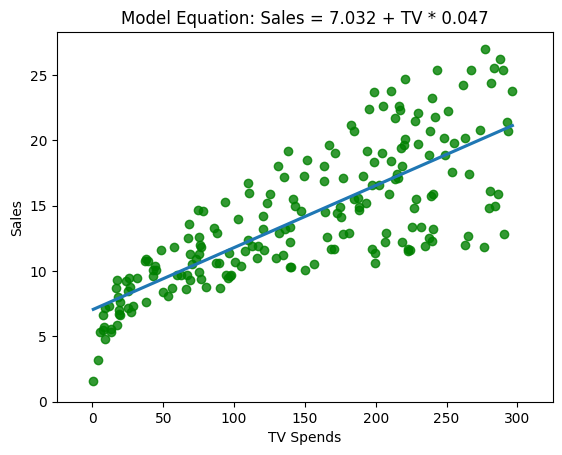

In [ ]:
import matplotlib.pyplot as plt
g = sns.regplot(x='TV', y='sales', data=df, scatter_kws={'color':'green'}, ci=None)
g.set_title('Model Equation: Sales = 7.032 + TV * 0.047')
g.set_ylabel('Sales')
g.set_xlabel('TV Spends')
plt.xlim(-25, 325)
plt.ylim(bottom=0)

In [ ]:
model.predict([[182]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.68426211])

In [ ]:
try_data = [[-15], [300], [405]]
model.predict(try_data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 6.31954394, 21.29358568, 26.28493292])

In [ ]:
real_y = y[0:10]
assumed_y = pd.DataFrame(model.predict(x)[0:10])

In [ ]:
loss = pd.concat([real_y, assumed_y], axis=1)
loss.columns = ['real', 'assumed']
loss

,real,assumed
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [ ]:
loss["Loss_Val"] = (loss["real"] - loss["assumed"])**2
loss

,real,assumed,Loss_Val
0,22.1,17.970775,17.050503
1,10.4,9.147974,1.567569
2,9.3,7.850224,2.101851
3,18.5,14.234395,18.195390
4,12.9,15.627218,7.437719
5,7.2,7.446162,0.060596
6,11.8,9.765950,4.137358
7,13.2,12.746498,0.205664
8,4.8,7.441409,6.977040
9,10.6,16.530414,35.169814


In [ ]:
import numpy as np

In [ ]:
np.mean(loss["Loss_Val"])

9.290350329638102

Multiple Variable

In [ ]:
import statsmodels.api as sm

In [ ]:
x_new = df[['TV', 'radio', 'newspaper']]

In [ ]:
lm = sm.OLS(y, x_new)

In [ ]:
model2 = lm.fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Wed, 26 Feb 2025   Prob (F-statistic):                   2.43e-171
Time:                        11:18:01   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm = LinearRegression()
model3 = lm.fit(df[['TV', 'radio', 'newspaper']], df['sales'])

In [ ]:
print(model3.intercept_)
print(model3.coef_)

2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


2.938 / TV .045, Radio .188, Newspeper -.001

In [ ]:
model3.predict([[10, 80, 10]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18.46856225])

In [ ]:
PreVal = [[300], [400], [10]]
predictVal = pd.DataFrame(PreVal).T
model3.predict(predictVal)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92.06991484])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
MSE = mean_squared_error(y, model3.predict(x_new))
MSE

2.784126314510936

In [ ]:
RMSE = np.sqrt(MSE)
RMSE

1.6685701407225697

Model Tuning

In [ ]:
x_new.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.20, random_state=70)

In [ ]:
print(X_train.head())
print(X_test.head())

        TV  radio  newspaper
54   262.7   28.8       15.9
89   109.8   47.8       51.4
37    74.7   49.4       45.7
152  197.6   23.3       14.2
19   147.3   23.9       19.1
        TV  radio  newspaper
115   75.1   35.0       52.7
17   281.4   39.6       55.8
164  117.2   14.7        5.4
197  177.0    9.3        6.4
57   136.2   19.2       16.6


In [ ]:
print(y_train.head())
print(y_test.head())

54     20.2
89     16.7
37     14.7
152    16.6
19     14.6
Name: sales, dtype: float64
115    12.6
17     24.4
164    11.9
197    12.8
57     13.2
Name: sales, dtype: float64


In [ ]:
lm = LinearRegression()
model4 = lm.fit(X_train, y_train)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_train, model4.predict(X_train)))
rmse

1.7229850508613447

In [ ]:
rmse_Test = np.sqrt(mean_squared_error(y_test, model4.predict(X_test)))
rmse_Test

1.4613869463378317

K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(model4, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

array([-2.5895198 , -3.77488593, -3.27254299, -6.9682045 , -1.80800429,
       -2.60419685, -3.01518953, -1.81438166, -2.89197637, -3.0690152 ])

kfcv mse

In [ ]:
np.mean(-cross_val_score(model4, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))

3.1807917126016347

kfcv rmse

In [ ]:
RMSE_KFCV_Train = np.sqrt(np.mean(-cross_val_score(model4, X_train, y_train, cv=10, scoring='neg_mean_squared_error')))
RMSE_KFCV_Train

1.783477421388237

In [ ]:
RMSE_KFCV_Test = np.sqrt(np.mean(-cross_val_score(model4, X_test, y_test, cv=10, scoring='neg_mean_squared_error')))
RMSE_KFCV_Test

1.464145803654076

0/10 Good
10/30 Acceptable
30+ High

In [ ]:
rmse_diff_percentage = ((RMSE_KFCV_Test - RMSE_KFCV_Train) / RMSE_KFCV_Train) * 100
print(f"RMSE Farkı: {rmse_diff_percentage:.2f}%")

RMSE Farkı: -17.90%
